In [4]:
import pandas as pd


df = pd.read_csv("youtube.csv",index_col=0)

# df.head()

인기동영상 제작횟수가 많은 채널 상위 10개명을 출력하라 (날짜기준, 중복포함)

논란으로 인기동영상이 된 케이스를 확인하고 싶다. dislikes수가 like 수보다 높은 동영상을 제작한 채널을 모두 출력하라

In [5]:
%%time
# df.info()
sf = df[df["dislikes"] > df["likes"]]
channel = sf.channelTitle.unique()
channel = pd.Series(channel)
print(channel)

0                          핫도그TV
1                      ASMR 애정TV
2                  하얀트리HayanTree
3                    양팡 YangPang
4                 철구형 (CHULTUBE)
5                         왜냐맨하우스
6                 (MUTUBE)와꾸대장봉준
7                          오메킴TV
8                            육지담
9                  MapleStory_KR
10    ROAD FIGHTING CHAMPIONSHIP
11                       사나이 김기훈
12                  나혼자산다 STUDIO
13                 Gen.G esports
dtype: object
Wall time: 22 ms


채널명을 바꾼 케이스가 있는지 확인하고 싶다. channelId의 경우 고유값이므로 이를 통해 채널명을 한번이라도 바꾼 채널의 갯수를 구하여라

In [94]:
import time
st = time.time()
channels = df["channelId"].unique()
print(len(df), len(titles))
changes = []
## 아래와 같이 하면 너무 느림.. 

60399 1832


In [97]:
%%time
st = time.time()
for id in channels:
    sf = df[df["channelId"] == id]
    sf_unique = sf["channelTitle"].unique()
#     print(id, sf_unique)
    if len(sf_unique) > 1:
#         print(id,"->",sf_unique)
        changes.append(id)
    
print(len(changes))
ed = time.time()
print(ed-st,"초 지남")

213
7.4057698249816895 초 지남
Wall time: 7.41 s


In [98]:
dd = df[['channelTitle','channelId']].drop_duplicates()
# print(dd.head())

change = df[['channelTitle','channelId']].drop_duplicates().channelTitle.value_counts()
# print(len(change),change)
target = change[change>1]
# print(target)
print(len(target), time.time() - ed)
# print(df[df["channelId"] == "UCtQYhzJWFai1y30UIA3uwYQ" ][["channelTitle","channelId"]])


2 79393.57095265388


In [104]:
%%time
df.info()
df["trending_date2"] = pd.to_datetime(df["trending_date2"])

<class 'pandas.core.frame.DataFrame'>
Index: 60399 entries, [신병] 물자창고 to ENHYPEN (엔하이픈) 'Tamed-Dashed' Official MV
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   channelTitle    60399 non-null  object        
 1   categoryId      60399 non-null  int64         
 2   view_count      60399 non-null  int64         
 3   likes           60399 non-null  int64         
 4   dislikes        60399 non-null  int64         
 5   comment_count   60399 non-null  int64         
 6   channelId       60399 non-null  object        
 7   trending_date2  60399 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 4.1+ MB
Wall time: 22.7 ms


In [347]:
# 일요일에 인기 있었던 영상물 중 가장 있기 잇었던 categoryID 는 
sf = df[df["trending_date2"].dt.weekday == 6]

s = sf["categoryId"].value_counts()
print(s.head(1))
# df["month"] = df["trending_date2"].dt.month_name()
# df["weekday"] = df["trending_date2"].dt.weekday
# df["quarter"] = df["trending_date2"].dt.quarter
# df["day"] = df["trending_date2"].dt.week

# print(df.groupby("day")["likes"].sum())

# like = sf.sort_values("likes", ascending=False).head(1)
# print("channelid ->",like["categoryId"],"likes ->",like["likes"])
# print(like)

df["dow"] = df["trending_date2"].dt.day_name().str.lower().str[:3]

import datetime

_dt = datetime.datetime(2024,5,1, 0,0,0)
print(_dt.weekday, _dt.weekday == 2)



24    3096
Name: categoryId, dtype: int64
<built-in method weekday of datetime.datetime object at 0x000001AE2343F660> False


In [360]:
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
answer =df.loc[df['trending_date2'].dt.day_name() =='Sunday'].categoryId
print(answer.shape)

(8600,)


In [398]:
# ss = df.groupby([df['trending_date2'].dt.day_name(),'categoryId'],as_index=False)
print(ss.size())
group = df.groupby([df['trending_date2'].dt.day_name(),'categoryId'],as_index=False).size()
# print(type(group), group.info())
answer= group.pivot(index='categoryId',columns='trending_date2', values='size')
print(answer)
# display(answer)
# df["trending_date2"]

    trending_date2  categoryId  size
0           Friday           1   243
1           Friday           2   120
2           Friday          10   833
3           Friday          15   187
4           Friday          17   633
5           Friday          19    90
6           Friday          20   283
7           Friday          22  1288
8           Friday          23   568
9           Friday          24  2976
10          Friday          25   444
11          Friday          26   369
12          Friday          27   183
13          Friday          28   171
14          Friday          29    12
15          Monday           1   263
16          Monday           2   105
17          Monday          10   837
18          Monday          15   215
19          Monday          17   668
20          Monday          19    92
21          Monday          20   298
22          Monday          22  1373
23          Monday          23   594
24          Monday          24  3148
25          Monday          25   453
2

In [280]:
sampls = np.random.randint(0,10,1000)

s = pd.Series(sampls).value_counts()
s_df = pd.DataFrame(s)
s_df["test"] = 0
s_df.rename(columns = {0:"num"})
s_df

,0,test
5,112,0
4,110,0
0,110,0
9,104,0
2,96,0
1,96,0
3,94,0
8,93,0
6,93,0
7,92,0



### 5
각 요일별 인기 영상들의 categoryId는 각각 몇개 씩인지 하나의 데이터 프레임으로 표현하라


In [384]:
pd.options.display.max_rows = None
# sss = df.groupby("weekday").categoryId()
sdf = pd.crosstab(df["categoryId"],df["dow"])
sss = pd.pivot_table(df,index="categoryId",columns = "dow")

ValueError: Grouper for 'dow' not 1-dimensional

In [382]:
type(sdf), type(sss)
sdf.index, sss.index
# print(sss)


(Int64Index([1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29], dtype='int64', name='categoryId'),
 Int64Index([1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29], dtype='int64', name='categoryId'))

In [378]:
df["dow"] = df["trending_date2"].dt.day_name().str.lower().str[:3]
# df["dow"] = df["dow"].str[:3]
df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 60399 entries, [신병] 물자창고 to ENHYPEN (엔하이픈) 'Tamed-Dashed' Official MV
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   channelTitle    60399 non-null  object        
 1   categoryId      60399 non-null  int64         
 2   view_count      60399 non-null  int64         
 3   likes           60399 non-null  int64         
 4   dislikes        60399 non-null  int64         
 5   comment_count   60399 non-null  int64         
 6   channelId       60399 non-null  object        
 7   trending_date2  60399 non-null  datetime64[ns]
 8   month           60399 non-null  object        
 9   weekday         60399 non-null  int64         
 10  quarter         60399 non-null  int64         
 11  day             60399 non-null  int64         
 12  dow             60399 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 7.7+ MB


댓글의 수로 (comment_count) 영상 반응에 대한 판단을 할 수 있다. viewcount대비 댓글수가 가장 높은 영상을 확인하라 (view_count값이 0인 경우는 제외한다)

In [443]:
%%time
# df.info()
dels = df[df["view_count"] == 0]
# print(dels["view_count"])
sf = df.drop(index=dels.index , axis = 0)
# print(len(sf))
sf["ratio"] =  sf["comment_count"] / sf["view_count"]
cvf = sf[sf["ratio"] == sf["ratio"].max()]
cvf[["view_count","comment_count","ratio"]].head()

Wall time: 25.9 ms


c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,view_count,comment_count,ratio
title,,,
"60분 동안 댓글이 달리지 않으면, 영상이 삭제됩니다. (챌린지)",1214527,196166,0.161516


In [444]:
%%time
# df.info()
sf = df[df["view_count"] != 0]
# print(dels["view_count"])
# sf = df.drop(index=dels.index , axis = 0)
# print(len(sf))
sf["ratio"] =  sf["comment_count"] / sf["view_count"]
cvf = sf[sf["ratio"] == sf["ratio"].max()]
cvf[["view_count","comment_count","ratio"]].head()

Wall time: 26.3 ms


c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,view_count,comment_count,ratio
title,,,
"60분 동안 댓글이 달리지 않으면, 영상이 삭제됩니다. (챌린지)",1214527,196166,0.161516


like 대비 dislike의 수가 가장 적은 영상은 무엇인가? (like, dislike 값이 0인경우는 제외한다)

In [479]:
df.info()
df_ld = df[ (df["likes"] != 0) & (df["dislikes"] != 0)]
df_ld.dropna(inplace=True)
df_ld["ratio_ld"] = df_ld["dislikes"] / df_ld["likes"]
_min = df_ld["ratio_ld"].min()
s = df_ld[df_ld["ratio_ld"] == _min]
print(s.index)


<class 'pandas.core.frame.DataFrame'>
Index: 60399 entries, [신병] 물자창고 to ENHYPEN (엔하이픈) 'Tamed-Dashed' Official MV
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   channelTitle    60399 non-null  object        
 1   categoryId      60399 non-null  int64         
 2   view_count      60399 non-null  int64         
 3   likes           60399 non-null  int64         
 4   dislikes        60399 non-null  int64         
 5   comment_count   60399 non-null  int64         
 6   channelId       60399 non-null  object        
 7   trending_date2  60399 non-null  datetime64[ns]
 8   month           60399 non-null  object        
 9   weekday         60399 non-null  int64         
 10  quarter         60399 non-null  int64         
 11  day             60399 non-null  int64         
 12  dow             60399 non-null  object        
 13  cvf             60392 non-null  float64       
 14  ratio          

c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 문제 9
가장많은 트렌드 영상을 제작한 채널의 이름은 무엇인가? (날짜기준, 중복포함)

In [511]:
%%time

ss = df["channelTitle"].value_counts().sort_values(ascending=False)


index = df["channelTitle"].value_counts().sort_values(ascending=False).index[0]


KeyError: './channelTitle'

In [192]:
import pandas as pd


channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')

# display(channel.head())
# display(video.head())

channel.to_csv(path_or_buf="channel.csv")
video.to_csv("video.csv")


In [45]:
channel = pd.read_csv("channel.csv")
i = channel.info()
channel["ct"] = pd.to_datetime(channel["ct"])
channel.info()
channel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1395 non-null   int64 
 1   channelid    1395 non-null   object
 2   subcnt       1395 non-null   int64 
 3   viewcnt      1395 non-null   int64 
 4   videocnt     1395 non-null   int64 
 5   ct           1395 non-null   object
 6   channelname  1395 non-null   object
dtypes: int64(4), object(3)
memory usage: 76.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1395 non-null   int64         
 1   channelid    1395 non-null   object        
 2   subcnt       1395 non-null   int64         
 3   viewcnt      1395 non-null   int64         
 4   videocnt     1395 non-null   int64         
 5   ct           1395 no

,Unnamed: 0,channelid,subcnt,viewcnt,videocnt,ct,channelname
0,0,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,410238653,736,2021-09-30 03:01:03,꽈뚜룹
1,1,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,736,2021-09-30 09:01:03,꽈뚜룹
2,2,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,735,2021-09-30 15:01:03,꽈뚜룹
3,3,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,737,2021-09-30 21:01:03,꽈뚜룹
4,4,UCkQCwnkQfgSuPTTnw_Y7v7w,1320000,412531322,737,2021-10-01 03:01:04,꽈뚜룹


Channel 데이터중 2021-10-03일 이후 각 채널의 처음 기록 됐던 구독자 수(subcnt)를 출력하라

In [53]:
df = channel[ channel["ct"] >= '2021-10-03']
df = df[["channelname","ct","subcnt"]]
names = df["channelname"].unique()
ll = []
for i in names:
    sf = df[df["channelname"] == i]
    sf = sf.sort_values(["ct"])
#     print(sf.head(1))
    subcnt = sf.head(1)["subcnt"]
#     print("sub", subcnt)
    print(type(subcnt), subcnt.index, subcnt.values)
    ll.append({i:subcnt.values})    

print(ll)

<class 'pandas.core.series.Series'> Int64Index([12], dtype='int64') [1330000]
<class 'pandas.core.series.Series'> Int64Index([139], dtype='int64') [257000]
<class 'pandas.core.series.Series'> Int64Index([266], dtype='int64') [322000]
<class 'pandas.core.series.Series'> Int64Index([393], dtype='int64') [922000]
<class 'pandas.core.series.Series'> Int64Index([520], dtype='int64') [55000]
<class 'pandas.core.series.Series'> Int64Index([647], dtype='int64') [215000]
<class 'pandas.core.series.Series'> Int64Index([774], dtype='int64') [14900]
<class 'pandas.core.series.Series'> Int64Index([901], dtype='int64') [7520]
<class 'pandas.core.series.Series'> Int64Index([1028], dtype='int64') [10100]
<class 'pandas.core.series.Series'> Int64Index([1155], dtype='int64') [471000]
<class 'pandas.core.series.Series'> Int64Index([1276], dtype='int64') [54300]
[{'꽈뚜룹': array([1330000], dtype=int64)}, {'야전삽짱재': array([257000], dtype=int64)}, {'츄정ChuJeong': array([322000], dtype=int64)}, {'논리왕 전기': array(

In [59]:
channel.ct = pd.to_datetime(channel.ct)

t1 =channel[channel.ct >= pd.to_datetime('2021-10-03')].sort_values(['channelname','ct']).drop_duplicates('channelname')
a1 = t1[['channelname','subcnt']].reset_index(drop=True)
print(a1)
target = channel[channel.ct >= pd.to_datetime('2021-10-03')].sort_values(['ct','channelname']).drop_duplicates('channelname')
answer = target[['channelname','subcnt']].reset_index(drop=True)
print(answer)

        channelname   subcnt
0     Balming Tiger    54300
1     곽토리 kwak tori   471000
2        김농밀의 농밀한 삶     7520
3               꽈뚜룹  1330000
4            논리왕 전기   922000
5       릴펄 Lilpearl    10100
6             야전삽짱재   257000
7   와글와글 WagleWagle    55000
8               조나단   215000
9        츄정ChuJeong   322000
10          형사!탐정되다    14900
        channelname   subcnt
0            논리왕 전기   922000
1             야전삽짱재   257000
2        츄정ChuJeong   322000
3        김농밀의 농밀한 삶     7520
4       릴펄 Lilpearl    10100
5   와글와글 WagleWagle    55000
6               조나단   215000
7           형사!탐정되다    14900
8     Balming Tiger    54300
9     곽토리 kwak tori   471000
10              꽈뚜룹  1330000


### 11 각채널의 2021-10-03 03:00:00 ~ 2021-11-01 15:00:00 까지 구독자수 (subcnt) 의 증가량을 구하여라

In [140]:
t1 =channel[(channel.ct >= pd.to_datetime('2021-10-03 03:00:00')) &  (channel.ct <= pd.to_datetime('2021-11-01 15:00:00'))]
# t1 = t1[["channelname","ct"]]
# begin = t1.sort_values(["channelname","ct"])
# print(begin)
begin = t1.sort_values(["channelname","ct"]).drop_duplicates("channelname")

begin = begin[["channelname","subcnt"]]
begin.reset_index(drop=True, inplace=True)
end = t1.sort_values(["channelname","ct"]).drop_duplicates("channelname",keep='last')
end = end[["channelname","subcnt"]]
end.reset_index(drop=True, inplace=True)

# tt = pd.merge(begin,end)
# tt['del'] = tt['end_sub'] - tt['start_sub']

begin["last"] = end["subcnt"]
begin["rate"] = round((begin["last"] - begin["subcnt"]),3)
print(begin[["channelname","rate"]])
begin.loc[:,["channelname","rate"]]


        channelname   rate
0     Balming Tiger   2500
1     곽토리 kwak tori  -2000
2        김농밀의 농밀한 삶   1540
3               꽈뚜룹  70000
4            논리왕 전기 -11000
5       릴펄 Lilpearl  11000
6             야전삽짱재  11000
7   와글와글 WagleWagle      0
8               조나단  12000
9        츄정ChuJeong   1000
10          형사!탐정되다  10300


,channelname,rate
0,Balming Tiger,2500
1,곽토리 kwak tori,-2000
2,김농밀의 농밀한 삶,1540
3,꽈뚜룹,70000
4,논리왕 전기,-11000
5,릴펄 Lilpearl,11000
6,야전삽짱재,11000
7,와글와글 WagleWagle,0
8,조나단,12000
9,츄정ChuJeong,1000


In [141]:
end = channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') =='2021-11-01 15']
start = channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') =='2021-10-03 03']

end_df = end[['channelname','subcnt']].reset_index(drop=True)
start_df = start[['channelname','subcnt']].reset_index(drop=True)

end_df.columns = ['channelname','end_sub']
start_df.columns = ['channelname','start_sub']


tt = pd.merge(start_df,end_df)
tt['del'] = tt['end_sub'] - tt['start_sub']
result = tt[['channelname','del']]
display(result)

,channelname,del
0,꽈뚜룹,70000
1,야전삽짱재,11000
2,츄정ChuJeong,1000
3,논리왕 전기,-11000
4,와글와글 WagleWagle,0
5,조나단,12000
6,형사!탐정되다,10300
7,김농밀의 농밀한 삶,1540
8,릴펄 Lilpearl,11000
9,곽토리 kwak tori,-2000


### 12
각 비디오는 10분 간격으로 구독자수, 좋아요, 싫어요수, 댓글수가 수집된것으로 알려졌다. 공범 EP1의 비디오정보 데이터중 수집간격이 5분 이하, 20분이상인 데이터 구간( 해당 시점 전,후) 의 시각을 모두 출력하라

In [9]:
video = pd.read_csv("video.csv")
# video = video.drop_duplicates()7777
# video = video.dropna()
video.reset_index(inplace=True)
video.ct = pd.to_datetime(video.ct)
dd =video.ct.diff(1)

from datetime import timedelta
tt =dd[(dd <= timedelta(minutes=5)) | (dd >= timedelta(minutes=20))].index
tt2 =[]

length = len(video)
print(length)
for n in tt:
    tt2.append(n-1)
    tt2.append(n)
    tt2.append(n+1)

s = pd.Series(index=tt2, data = tt2)
# print(s.index)
# tt = s.index
# print(video.loc[722,:])

print(video.loc[s.index,:])

# for i in video.iterrows():
#     print(i)

# for i in s.index:
#     try:
#         print(video.loc[i,:])
#     except Exception as e :
#         print(i,e)

15201
       index  Unnamed: 0      videopk  viewcnt  likecnt  dislikecnt  \
9          9           9  c5JQp6xafqc  1697079    30724         717   
10        10          10  c5JQp6xafqc     6396      680           3   
11        11          11  c5JQp6xafqc    13087     1113           7   
417      417         417  c5JQp6xafqc  1663790    30454         703   
418      418         418  c5JQp6xafqc  1700233    30747         716   
...      ...         ...          ...      ...      ...         ...   
14256  14256       14256  AxGKHmXyuAE  1473758    22863         315   
14257  14257       14257  AxGKHmXyuAE  1474396    22867         317   
14934  14934       14934  AxGKHmXyuAE  1750222    24494         389   
14935  14935       14935  yZt-h-KcmUE    82015     3338          78   
14936  14936       14936  yZt-h-KcmUE   112026     4256         224   

       favoritecnt  cmcnt                  ct videoname  
9                0   6621 2021-10-10 16:50:03    공범 EP1  
10               0    226

In [17]:
import scipy.stats as st

x = st.randint.rvs(10,1000,size=100)
print(x)

[ 81 240  58 882 593 528  92 328 584 639 760 862 498 605 395 360  19 227
 294 954 675 670 800 561 324  78 304 691 149 510 623 753 428 817 112 495
 766 211 101 825 269 926 664 106 784 411 215 922 210 267 121 224 936  81
 456  63 202  42 200 562 676 125 979 761 905 150 936 320  11 650 236 831
 405 783 467 422 476 444 962  60 722 725 579 408 340 572 627 787 164 895
 977 697 444 124 540  14 413 787 196 627]


### 16 각 에피소드의 시작날짜(년-월-일)를 에피소드 이름과 묶어 데이터 프레임으로 만들고 출력하라

In [35]:
%who
video["date"] = pd.to_datetime(video["ct"], format = "%Y%m%d")
video["date"] = video["date"].dt.strftime("%Y-%m-%d")
video["hh"] = video["date"] +"_"+ video["videoname"]
video["hh"]

channel	 dd	 df	 length	 n	 pd	 s	 sf	 st	 
timedelta	 tt	 tt2	 video	 x	 


0        2021-10-10_ 공범 EP1
1        2021-10-10_ 공범 EP1
2        2021-10-10_ 공범 EP1
3        2021-10-10_ 공범 EP1
4        2021-10-10_ 공범 EP1
                ...        
15196    2021-11-01_ 공범 EP8
15197    2021-11-01_ 공범 EP8
15198    2021-11-01_ 공범 EP8
15199    2021-11-01_ 공범 EP8
15200    2021-11-01_ 공범 EP8
Name: hh, Length: 15201, dtype: object

In [37]:
start_date = video.sort_values(['ct','videoname']).drop_duplicates('videoname')[['ct','videoname']]
start_date['date'] = start_date.ct.dt.date
answer = start_date[['date','videoname']]
display(answer)

,date,videoname
10,2021-10-07,공범 EP1
3496,2021-10-09,공범 EP2
6696,2021-10-14,공범 EP3
9264,2021-10-16,공범 EP4
11544,2021-10-21,공범 EP5
13661,2021-10-23,공범 EP6
13106,2021-10-28,공범 EP7
14935,2021-10-30,공범 EP8


### 문제19
video 정보의 가장 최근 데이터들에서 각 에피소드의 싫어요/좋아요 비율을 ratio 컬럼으로 만들고 videoname, ratio로 구성된 데이터 프레임을 ratio를 오름차순으로 정렬하라

In [43]:
video.info()
video["ratio"] = video["dislikecnt"] / video["likecnt"]
mydf = video[["videoname","ratio"]].sort_values(["ratio"])
mydf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15201 entries, 0 to 15200
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        15201 non-null  int64         
 1   Unnamed: 0   15201 non-null  int64         
 2   videopk      15201 non-null  object        
 3   viewcnt      15201 non-null  int64         
 4   likecnt      15201 non-null  int64         
 5   dislikecnt   15201 non-null  int64         
 6   favoritecnt  15201 non-null  int64         
 7   cmcnt        15201 non-null  int64         
 8   ct           15201 non-null  datetime64[ns]
 9   videoname    15201 non-null  object        
 10  date         15201 non-null  object        
 11  hh           15201 non-null  object        
 12  rate         15201 non-null  float64       
 13  ratio        15201 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(7), object(4)
memory usage: 1.6+ MB


,videoname,ratio
10,공범 EP1,0.004412
3496,공범 EP2,0.004926
9264,공범 EP4,0.004946
9265,공범 EP4,0.005305
9266,공범 EP4,0.005834
...,...,...
15197,공범 EP8,0.141333
15199,공범 EP8,0.141334
15195,공범 EP8,0.141338
15200,공범 EP8,0.141357


In [49]:
video = pd.read_csv("video.csv")
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15201 entries, 0 to 15200
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   15201 non-null  int64 
 1   videopk      15201 non-null  object
 2   viewcnt      15201 non-null  int64 
 3   likecnt      15201 non-null  int64 
 4   dislikecnt   15201 non-null  int64 
 5   favoritecnt  15201 non-null  int64 
 6   cmcnt        15201 non-null  int64 
 7   ct           15201 non-null  object
 8   videoname    15201 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.0+ MB


In [70]:
ll = set(video.index) -  set(video.drop_duplicates().index)
answer  = video[video.index.isin(set(video.index) -  set(video.drop_duplicates().index))]
## uniqure 
result = answer[['videoname','ct']]
# display(result)

video[video.index.isin([0,1,2])]

,Unnamed: 0,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
0,0,c5JQp6xafqc,1667010,30474,706,0,6587,2021-10-10 15:20:03,공범 EP1
1,1,c5JQp6xafqc,1669089,30495,707,0,6589,2021-10-10 15:30:03,공범 EP1
2,2,c5JQp6xafqc,1674759,30522,711,0,6596,2021-10-10 15:40:02,공범 EP1


In [204]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')

df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


In [158]:
# df.to_csv("worldcupgoals.csv")
# df = pd.read_csv("worldcupgoals.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   1295 non-null   object
 1   Goals    1295 non-null   int64 
 2   Years    1295 non-null   object
 3   Country  1295 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.6+ KB


### 21
주어진 전체 기간의 각 나라별 골득점수 상위 5개 국가와 그 득점수를 데이터프레임형태로 출력하라

In [182]:
# df.sort_values(["Country","Goals"], ascending=False)
dd=df.groupby(by="Country").sum().sort_values("Goals",ascending=False).iloc[:5,:]
print(type(df.groupby(by="Country").sum()))
dd.index, dd.values


<class 'pandas.core.frame.DataFrame'>


(Index(['Brazil', 'Germany', 'Argentina', 'Italy', 'France'], dtype='object', name='Country'),
 array([[228],
        [226],
        [135],
        [123],
        [115]], dtype=int64))

### Question 22
주어진 전체기간동안 골득점을 한 선수가 가장 많은 나라 상위 5개 국가와 선수 숫자를 데이터 프레임 형식으로 출력하라

In [241]:
# df.groupby(by="Country").sum().sort_values(["Goals"], ascending=False)
df.info()
# df.groupby("Country").sum().sort_values(["Goals"],ascending=False).head(5)
result = df.groupby('Country').size().sort_values(ascending=False).head(5)
# result = df.groupby(by='Country').size()
result2 = pd.value_counts(df["Country"]).head(5)
result == result2
result
print(type(result))

pd.options.display.max_rows = 10
print(df["Years"].unique())
# result.index, result.values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     1295 non-null   object
 1   Goals      1295 non-null   int64 
 2   Years      1295 non-null   object
 3   Country    1295 non-null   object
 4   Years_len  1295 non-null   int64 
 5   disp_nok   1295 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 52.0+ KB
<class 'pandas.core.series.Series'>
['2002-2006-2010-2014' '1998-2002-2006' '1970-1974' '1958'
 '1958-1962-1966-1970' '1990-1994-1998' '1954' '1994-1998-2002'
 '1986-1990' '2010-2014' '1954-1958' '1970-1978-1982' '1974-1978-1982'
 '1950' '1966-1970-1974' '1958-1962' '1978-1982-1986' '1978-1982'
 '1998-2002' '1966' '2006-2010-2014' '1982-1986-1990-1994' '1930'
 '1934-1938' '1986-1990-1994' '1950-1954' '1954-1958-1962' '1974-1978'
 '2006-2010-2014-2018' '2010-2014-2018' '1994-1998' '2014-2018'
 '1970-1974-1978' '2014' 

### Question 23

Years 컬럼은 년도 -년도 형식으로 구성되어있고, 각 년도는 4자리 숫자이다.
년도 표기가 4자리 숫자로 안된 케이스가 존재한다. 해당 건은 몇건인지 출력하라

In [248]:
print(df["Years"].head())
# print(len("aa"))

def check(data):
    years = str.split(data,"-")
    for year in years :
        if len(year) != 4 :
            return True
    return False     

a = df[df["Years"].map(check)]
# a = df[ df["disp_nok"]]
print(len(a))
pd.options.display.max_rows = None


0    2002-2006-2010-2014
1         1998-2002-2006
2              1970-1974
3                   1958
4    1958-1962-1966-1970
Name: Years, dtype: object
45


### 24, 25
Q3에서 발생한 예외 케이스를 제외한 데이터프레임을 df2라고 정의하고 데이터의 행의 숫자를 출력하라 
(아래 문제부터는 df2로 풀이하겠습니다) 
### 26
2002년도에 출전한 전체 선수는 몇명인가?

In [264]:
df["len_cup"] = (df["Years"].str.split("-"))
df["len_cup"] = df["len_cup"].map(lambda x : len(x))
df.loc[df.len_cup >= 4, :].shape[0]


16

## 서울시 따릉이 이용 데이터 


In [3]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv')
df.head()
df.to_csv("seoul_by.csv", index = False)


In [20]:
import pandas as pd
# df = pd.read_csv("seoul_by.csv")
import os

# os.rename("seoul_by.csv", "seoul_bi.csv")
df = pd.read_csv("seoul_bi.csv")
df.shape

(678950, 11)

### Question 31

대여일자별 데이터의 수를 데이터프레임으로 출력하고, 가장 많은 데이터가 있는 날짜를 출력하라

In [19]:
df.shape
df.info()
type(df.isna().sum())
df["대여일자"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678950 entries, 0 to 678949
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    678950 non-null  object 
 1   대여시간    678950 non-null  int64  
 2   대여소번호   678950 non-null  int64  
 3   대여구분코드  678950 non-null  object 
 4   성별      678950 non-null  object 
 5   연령대코드   678950 non-null  object 
 6   이용건수    678950 non-null  int64  
 7   운동량     678950 non-null  object 
 8   탄소량     678950 non-null  object 
 9   이동거리    678950 non-null  float64
 10  사용시간    678950 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 57.0+ MB


2021-06-04    56788
2021-06-02    56100
2021-06-08    55623
2021-06-14    54945
2021-06-09    54507
2021-06-05    52730
2021-06-07    52623
2021-06-11    52089
2021-06-12    48569
2021-06-01    48081
2021-06-06    47787
2021-06-13    43131
2021-06-10    36992
2021-06-03    18985
Name: 대여일자, dtype: int64

### Question 32

각 일자의 요일을 표기하고 (‘Monday’ ~’Sunday’) ‘day_name’컬럼을 추가하고 이를 이용하여 각 요일별 이용 횟수의 총합을 데이터 프레임으로 출력하라

In [33]:
df.head(1)
# df["대여일자1"] = pd.to_datetime(df["대여일자"])
df.head(1)
df["day_name"] = df["대여일자1"].dt.day_name()
df["day_name"].value_counts()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여일자1,day_name
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.0,8,2021-06-01,Tuesday


,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여일자1,day_name
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.0,8,2021-06-01,Tuesday


Wednesday    110607
Friday       108877
Monday       107568
Tuesday      103704
Saturday     101299
Sunday        90918
Thursday      55977
Name: day_name, dtype: int64

### Question 33
각 요일별 가장 많이 이용한 대여소의 이용횟수와 대여소 번호를 데이터 프레임으로 출력하라


In [184]:
from pydantic_settings import BaseSettings
from pandas_profiling import ProfileReport


ProfileReport(df)

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

In [121]:
sf = df[["day_name", "대여소번호","이용건수"]]
# display(sf)
# result = df.groupby(['day_name','대여소번호']).size()
# display(result)
# print(result.index, result.columns)
# # result.head()
s = sf.groupby(["day_name","대여소번호"]).sum().sort_values(["day_name","이용건수"],ascending=False).reset_index()
# result = s.drop_duplicates('day_name',keep='first').reset_index(drop=True)
result  =s.drop_duplicates("day_name",keep='first').reset_index(drop=True)
result


,day_name,대여소번호,이용건수
0,Wednesday,502,399
1,Tuesday,502,371
2,Thursday,2715,188
3,Sunday,502,574
4,Saturday,502,616
5,Monday,2715,374
6,Friday,2715,414


### Question 34

나이대별 대여구분 코드의 (일일권/전체횟수) 비율을 구한 후 가장 높은 비율을 가지는 나이대를 확인하라.
일일권의 경우 일일권 과 일일권(비회원)을 모두 포함하라


In [177]:
# df["연령대코드"].unique()
# df["대여구분코드"].unique()
# df.info()
import numpy as np
sf = df[["연령대코드","대여구분코드"]]
tf  =sf.groupby(["연령대코드","대여구분코드"]).size().to_frame("이용권수").reset_index()
a = tf.groupby(["연령대코드"]).sum().reset_index()
a.rename(columns={"이용권수":"합"})
a.columns, tf.columns
all = tf.merge(a, on="연령대코드", how='left' )
all["비율"] = np.round(all["이용권수_x"] / all["이용권수_y"]*100,3)
all = all[["연령대코드","대여구분코드","비율"]]
all[all["대여구분코드"] == "일일권"].reset_index(drop=True).sort_values("비율", ascending=False)

,연령대코드,합
0,20대,247561
1,30대,186722
2,40대,114799
3,50대,70428
4,60대,19288
5,70대~,3227
6,~10대,36925


(Index(['연령대코드', '이용권수'], dtype='object'),
 Index(['연령대코드', '대여구분코드', '이용권수'], dtype='object'))

,연령대코드,대여구분코드,비율
6,~10대,일일권,31.253
0,20대,일일권,23.990
1,30대,일일권,16.669
2,40대,일일권,11.056
3,50대,일일권,6.540
5,70대~,일일권,4.896
4,60대,일일권,4.246


In [2]:
from pydantic_settings import BaseSettings
from pandas_profiling import ProfileReport


ProfileReport(df)

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

2.2979082113026412 2.1195681758021006
ShapiroResult(statistic=0.9867480397224426, pvalue=0.4209050238132477) ShapiroResult(statistic=0.9907832145690918, pvalue=0.727729320526123)
BartlettResult(statistic=15.06462028978476, pvalue=0.00010389238920037935)
2.2979082113026412 2.1195681758021006


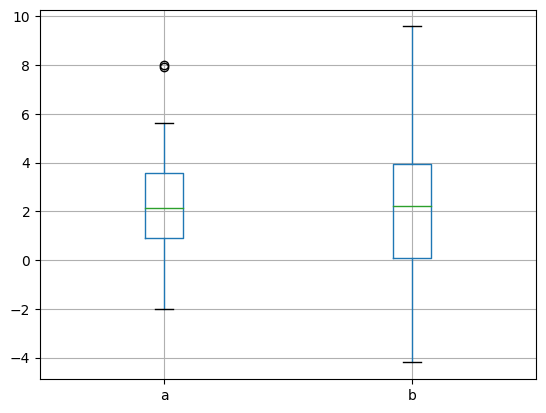

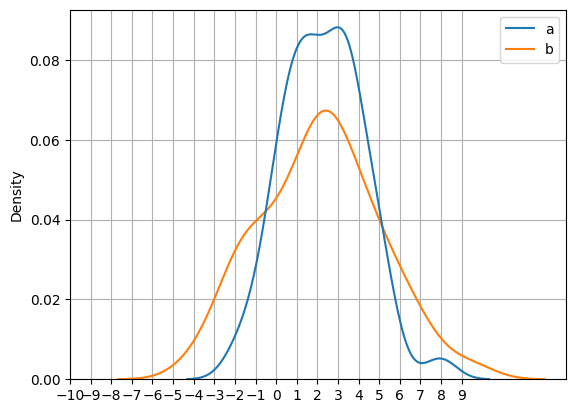

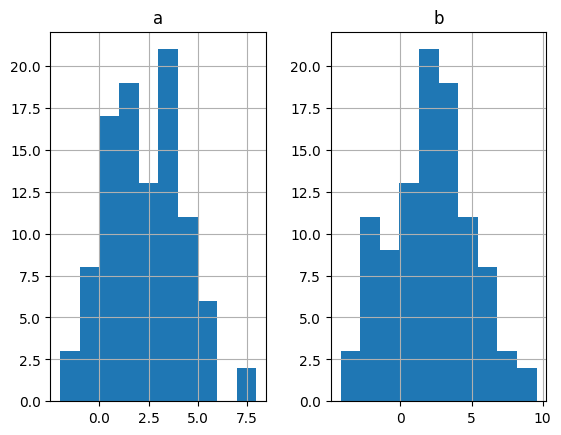

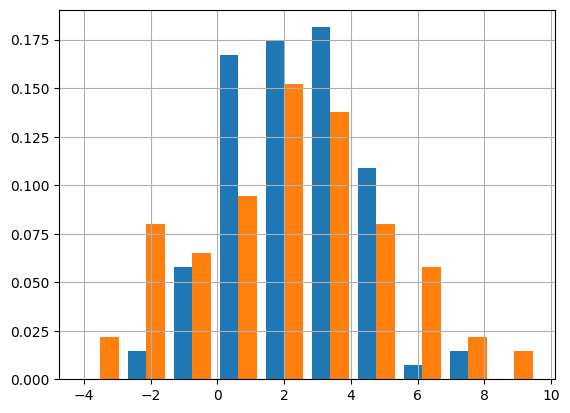

Ttest_indResult(statistic=0.5123345967906088, pvalue=0.6954656082393572)


In [49]:
import scipy.stats as sts
import pandas as pd

a = sts.norm(2,2)
b = sts.norm(2,3)

a = a.rvs(100)
b = b.rvs(100)

print(a.mean(), b.mean())
print(sts.shapiro(a), sts.shapiro(b))
print(sts.bartlett(a,b))

print(a.mean(), b.mean())

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"a":a,"b":b})
df.boxplot()
plt.show()

sns.kdeplot(df)
plt.xticks(np.arange(-10,10,1))
plt.grid(True)
plt.show()

df.hist()
# plt.xticks(np.arange(-10,10,1))
plt.grid(True)
plt.show()

plt.hist(df, density=True)
# plt.xticks(np.arange(-10,10,1))
plt.grid(True)
plt.show()


ret = sts.ttest_ind(a, b, equal_var=False, alternative='less' )

print(ret)